In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/Youtube Video Dataset.csv")

In [3]:
data.head()

,Title,Videourl,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...


In [4]:
data.columns

Index(['Title', 'Videourl', 'Category', 'Description'], dtype='object')

In [5]:
data = data.drop('Videourl',axis=1)

In [6]:
data.Category.value_counts()

travel blog           2200
Science&Technology    2074
Food                  1828
Art&Music             1765
manufacturing         1699
History               1645
Name: Category, dtype: int64

# Checking Null Values

In [7]:
data.isna()

,Title,Category,Description
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
11206,False,False,False
11207,False,False,False
11208,False,False,False
11209,False,False,False


In [8]:
data.isna().sum()

Title           0
Category        0
Description    83
dtype: int64

In [9]:
data.isnull().any()

Title          False
Category       False
Description     True
dtype: bool

In [10]:
data = data.dropna()

In [11]:
data

,Title,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...
...,...,...,...
11206,"art journal | shimmer sprays, stencils, collag...",Art&Music,Step by step video on creating an art journal ...
11207,Ar-Tea Collage * Mixed Media Art,Art&Music,"By: Ilene McInnes,\nMixed media Art and inspir..."
11208,DIY Mixed Media Art Collage Greeting Cards / M...,Art&Music,Make your own Mixed Media Greeting Cards\n\nHe...
11209,Art Collage Process DecoJournal using Rice Pap...,Art&Music,Art Collage Process DecoJournal using Rice Pap...


In [12]:
data.isna().sum()

Title          0
Category       0
Description    0
dtype: int64

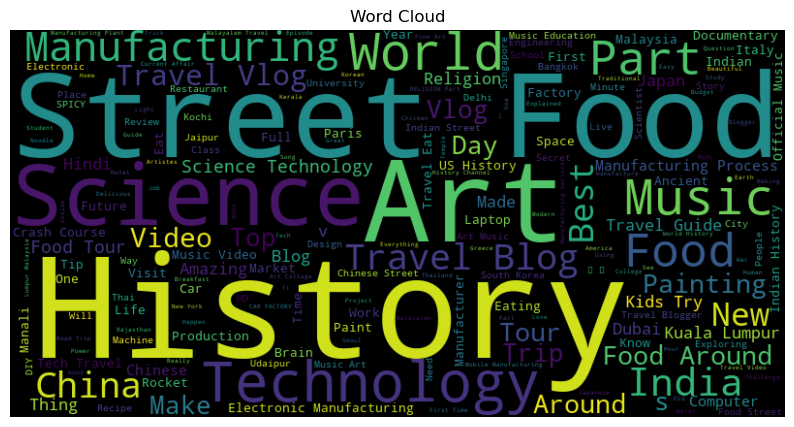

In [13]:
from wordcloud import WordCloud

# Combine all text into a single string
text = ' '.join(data['Title'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


<Axes: title={'center': 'Number of samples for each class'}>

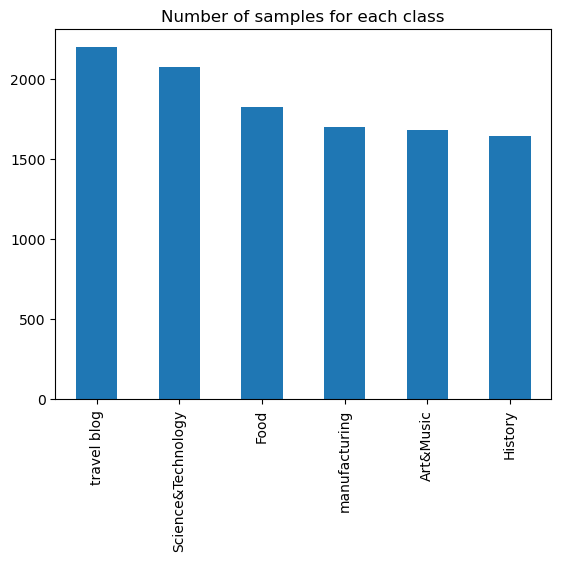

In [14]:
# Plotting class distribution
data['Category'].value_counts().sort_values(ascending=False).plot(kind='bar', y='Number of Samples',
                                                                title='Number of samples for each class')

# Text Processing

In [15]:
# Text to lowercase
data.Title = data.Title.str.lower()

In [16]:
data.Description = data.Description.str.lower()

In [17]:
data

,Title,Category,Description
0,madagascar street food!!! super rare malagasy ...,Food,🎥giant alien snail in japan! » https://youtu.b...
1,42 foods you need to eat before you die,Food,this is the ultimate must-try food bucket list...
2,gordon ramsay’s top 5 indian dishes,Food,we found 5 of the best and most interesting in...
3,how to use chopsticks - in about a minute 🍜,Food,you're most likely sitting in a restaurant wit...
4,trying indian food 1st time!,Food,help support sinstv!! shop our sponsors!\nlast...
...,...,...,...
11206,"art journal | shimmer sprays, stencils, collag...",Art&Music,step by step video on creating an art journal ...
11207,ar-tea collage * mixed media art,Art&Music,"by: ilene mcinnes,\nmixed media art and inspir..."
11208,diy mixed media art collage greeting cards / m...,Art&Music,make your own mixed media greeting cards\n\nhe...
11209,art collage process decojournal using rice pap...,Art&Music,art collage process decojournal using rice pap...


In [18]:
#Removing html tags and urls
import re
from bs4 import BeautifulSoup

In [19]:
def remove_html_tags_and_urls(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)
    
    return text

# Apply the function to "Title" column
data["Title"] = data["Title"].apply(remove_html_tags_and_urls)

# Apply the function to "Description" column
data["Description"] = data["Description"].apply(remove_html_tags_and_urls)

C:\Users\HP\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://www.aliexpress.com/store/1212109" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://yamaha.co.id/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.laptopscreen.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\HP\ana

In [20]:
data.head()

,Title,Category,Description
0,madagascar street food!!! super rare malagasy ...,Food,🎥giant alien snail in japan! » \n🇲🇬go on your ...
1,42 foods you need to eat before you die,Food,this is the ultimate must-try food bucket list...
2,gordon ramsay’s top 5 indian dishes,Food,we found 5 of the best and most interesting in...
3,how to use chopsticks - in about a minute 🍜,Food,you're most likely sitting in a restaurant wit...
4,trying indian food 1st time!,Food,help support sinstv!! shop our sponsors!\nlast...


In [21]:
#Removing The Special Charecters
data['Description'] = data['Description'].apply(lambda x: re.sub(r'[^a-z\s]','',x))

In [22]:
data['Title'] = data['Title'].apply(lambda x: re.sub(r'[^a-z\s]','',x))

In [23]:
data

,Title,Category,Description
0,madagascar street food super rare malagasy vil...,Food,giant alien snail in japan \ngo on your tour ...
1,foods you need to eat before you die,Food,this is the ultimate musttry food bucket list ...
2,gordon ramsays top indian dishes,Food,we found of the best and most interesting ind...
3,how to use chopsticks in about a minute,Food,youre most likely sitting in a restaurant with...
4,trying indian food st time,Food,help support sinstv shop our sponsors\nlast lo...
...,...,...,...
11206,art journal shimmer sprays stencils collage a...,Art&Music,step by step video on creating an art journal ...
11207,artea collage mixed media art,Art&Music,by ilene mcinnes\nmixed media art and inspirat...
11208,diy mixed media art collage greeting cards mi...,Art&Music,make your own mixed media greeting cards\n\nhe...
11209,art collage process decojournal using rice pap...,Art&Music,art collage process decojournal using rice pap...


In [24]:
#Romving stop words like 'is' 'are' that doesn't hold much meaning
import nltk
from nltk.corpus import stopwords

In [25]:
stop_words = set(stopwords.words('english'))
data['Title'] = data['Title'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
data['Description'] = data['Description'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [26]:
data.head()

,Title,Category,Description
0,madagascar street food super rare malagasy vil...,Food,giant alien snail japan go tour madagascar get...
1,foods need eat die,Food,ultimate musttry food bucket list burgers dipp...
2,gordon ramsays top indian dishes,Food,found best interesting indian recipes channel ...
3,use chopsticks minute,Food,youre likely sitting restaurant set chopsticks...
4,trying indian food st time,Food,help support sinstv shop sponsors last longer ...


In [27]:
#Stemming -- normalize words by removing suffixes or prefixes liske 'watching' to 'watch' ...  
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [28]:
#nltk.download('punkt')

In [29]:
stemmer = PorterStemmer()
data['Title'] = data['Title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
data['Description'] = data['Description'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

In [30]:
data.head()

,Title,Category,Description
0,madagascar street food super rare malagasi vil...,Food,giant alien snail japan go tour madagascar get...
1,food need eat die,Food,ultim musttri food bucket list burger dip chee...
2,gordon ramsay top indian dish,Food,found best interest indian recip channel inclu...
3,use chopstick minut,Food,your like sit restaur set chopstick hand say v...
4,tri indian food st time,Food,help support sinstv shop sponsor last longer b...


In [31]:
tokenizer = nltk.tokenize.word_tokenize
data['Title'] = data['Title'].apply(lambda x: tokenizer(x))
data['Description'] = data['Description'].apply(lambda x: tokenizer(x))
#data.Category = data.Category.apply(lambda x: tokenizer(x))

In [32]:
data

,Title,Category,Description
0,"[madagascar, street, food, super, rare, malaga...",Food,"[giant, alien, snail, japan, go, tour, madagas..."
1,"[food, need, eat, die]",Food,"[ultim, musttri, food, bucket, list, burger, d..."
2,"[gordon, ramsay, top, indian, dish]",Food,"[found, best, interest, indian, recip, channel..."
3,"[use, chopstick, minut]",Food,"[your, like, sit, restaur, set, chopstick, han..."
4,"[tri, indian, food, st, time]",Food,"[help, support, sinstv, shop, sponsor, last, l..."
...,...,...,...
11206,"[art, journal, shimmer, spray, stencil, collag]",Art&Music,"[step, step, video, creat, art, journal, layou..."
11207,"[artea, collag, mix, media, art]",Art&Music,"[ilen, mcinn, mix, media, art, inspir, intern,..."
11208,"[diy, mix, media, art, collag, greet, card, mi...",Art&Music,"[make, mix, media, greet, card, here, need, ma..."
11209,"[art, collag, process, decojourn, use, rice, p...",Art&Music,"[art, collag, process, decojourn, use, rice, p..."


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
# Convert tokenized text to TF-IDF vectors
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(data['Title'].apply(lambda x: ' '.join(x)) + ' ' + data['Description'].apply(lambda x: ' '.join(x)))
#Saving the TfidVectorizer
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

y = data.Category
# Splitting into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [34]:
y

0             Food
1             Food
2             Food
3             Food
4             Food
           ...    
11206    Art&Music
11207    Art&Music
11208    Art&Music
11209    Art&Music
11210    Art&Music
Name: Category, Length: 11128, dtype: object

In [35]:
X_tfidf

<11128x60043 sparse matrix of type '<class 'numpy.float64'>'
	with 763219 stored elements in Compressed Sparse Row format>

# Random Forest

In [36]:
#Creating the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [37]:
#traning
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [38]:
#testing
pred = rf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

In [40]:
accuracy_score(pred,y_test)

0.8867924528301887

In [41]:
confusion_matrix(y_test,pred)

array([[294,   7,   8,   4,   3,  16],
       [ 11, 329,   4,   4,   5,  21],
       [ 29,   4, 270,   8,   4,   7],
       [  7,   0,  21, 375,   9,   3],
       [  7,   2,  11,   4, 311,  10],
       [  9,  18,   5,   5,   6, 395]], dtype=int64)

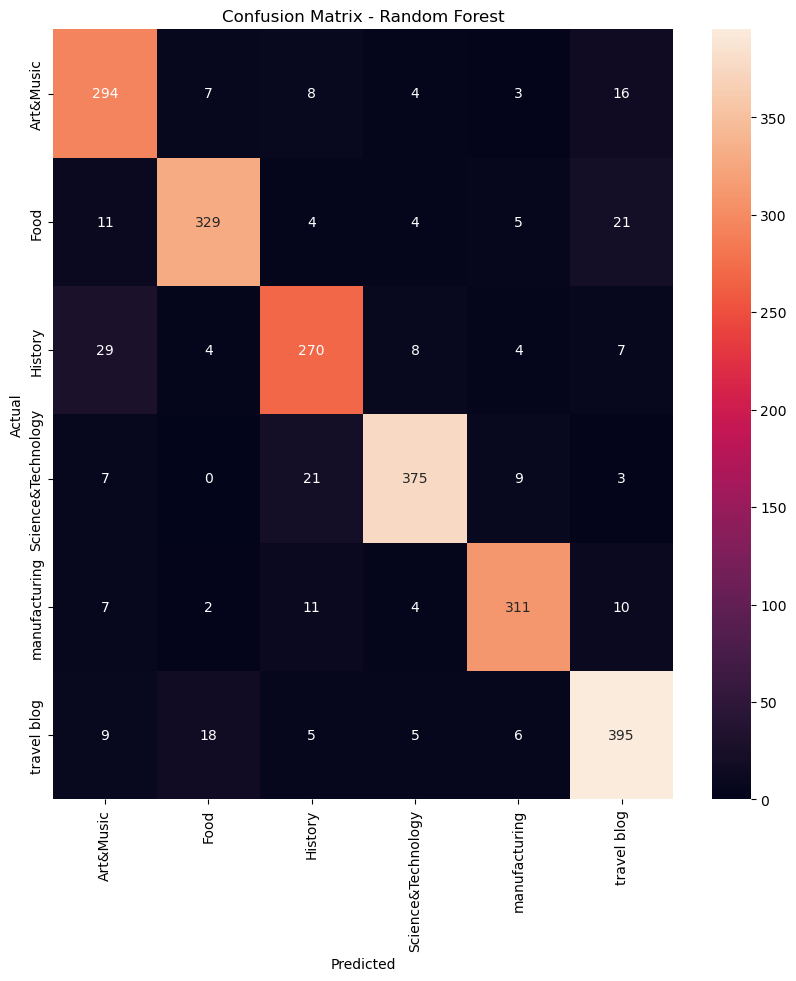

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test,pred)
label_encoder.fit(y_test)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(label_encoder.classes_), yticklabels=list(label_encoder.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()



In [44]:
print(classification_report(y_test,pred))

                    precision    recall  f1-score   support

         Art&Music       0.82      0.89      0.85       332
              Food       0.91      0.88      0.90       374
           History       0.85      0.84      0.84       322
Science&Technology       0.94      0.90      0.92       415
     manufacturing       0.92      0.90      0.91       345
       travel blog       0.87      0.90      0.89       438

          accuracy                           0.89      2226
         macro avg       0.89      0.89      0.89      2226
      weighted avg       0.89      0.89      0.89      2226



# SVM

In [45]:
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.svm import SVC
svm = SVC(probability=True)

In [46]:
svm=SVC(kernel="rbf")

In [47]:
svm.fit(X_train,y_train)

SVC()

In [48]:
pred = svm.predict(X_test)

In [49]:
accuracy_score(pred,y_test)

0.9645103324348607

In [50]:
confusion_matrix(pred,y_test)

array([[323,   1,   7,   0,   0,   3],
       [  0, 356,   0,   3,   0,   9],
       [  5,   3, 309,   7,   4,   2],
       [  1,   3,   4, 400,   1,   0],
       [  0,   2,   0,   3, 338,   3],
       [  3,   9,   2,   2,   2, 421]], dtype=int64)

In [51]:
print(classification_report(y_test,pred))

                    precision    recall  f1-score   support

         Art&Music       0.97      0.97      0.97       332
              Food       0.97      0.95      0.96       374
           History       0.94      0.96      0.95       322
Science&Technology       0.98      0.96      0.97       415
     manufacturing       0.98      0.98      0.98       345
       travel blog       0.96      0.96      0.96       438

          accuracy                           0.96      2226
         macro avg       0.96      0.96      0.96      2226
      weighted avg       0.96      0.96      0.96      2226



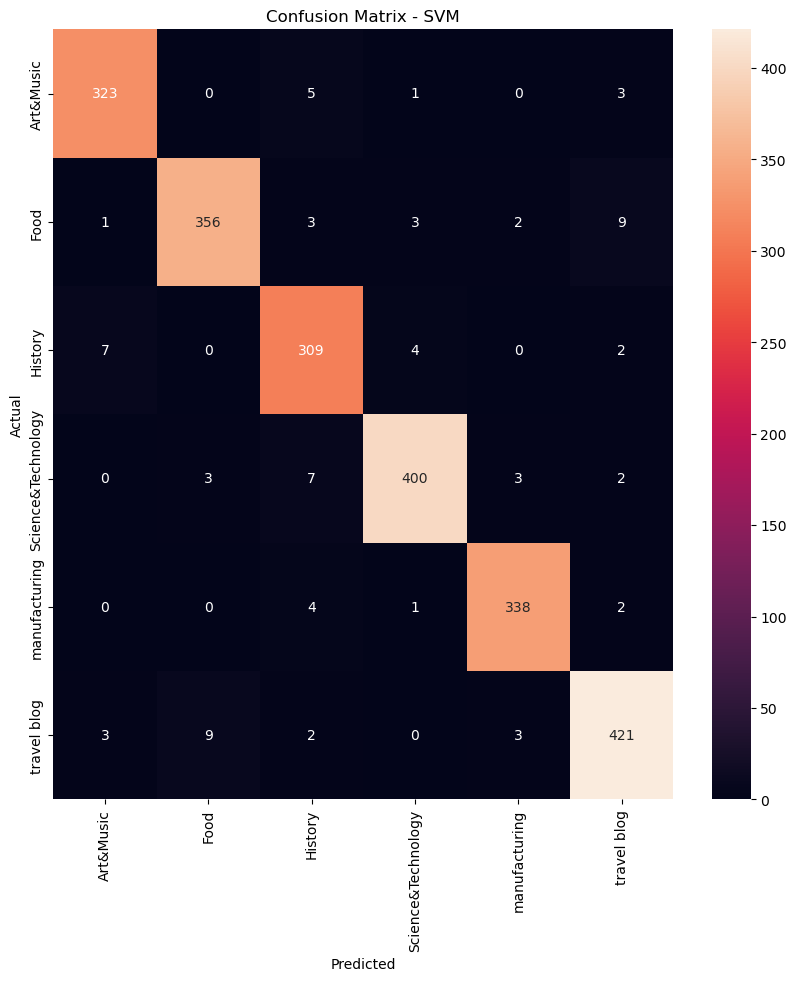

In [52]:
conf_mat= confusion_matrix(y_test,pred)
label_encoder.fit(y_test)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(label_encoder.classes_), yticklabels=list(label_encoder.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.show()

# Saving the SVM model

In [53]:
#filename='svm_model.pkl'
#pickle.dump(svm,open(filename,'wb'))

# XG Boost

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

# Concatenate tokenized text back into sentences
data['Title'] = data['Title'].apply(lambda x: ' '.join(x))
data['Description'] = data['Description'].apply(lambda x: ' '.join(x))

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the combined 'Title' and 'Description' data
vectorizer.fit(data['Title'] + ' ' + data['Description'])

# Transform the tokenized text into numerical features
X = vectorizer.transform(data['Title'] + ' ' + data['Description'])

In [55]:


# Fit the label encoder on the 'Category' data
label_encoder.fit(data["Category"])

# Transform the categorical labels into numerical representation
y = label_encoder.transform(data["Category"])


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
import xgboost as xgb

In [58]:
xg= xgb.XGBClassifier(n_estimators=10)

In [59]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [60]:
pred = xg.predict(X_test)

In [61]:
accuracy_score(y_test,pred)

0.9483378256963163

In [62]:
confusion_matrix(y_test,pred)

array([[320,   2,   1,   0,   1,   8],
       [  1, 363,   0,   2,   1,   7],
       [ 11,   1, 293,   7,   3,   7],
       [  2,   1,   4, 400,   3,   5],
       [  0,   2,   0,   6, 325,  12],
       [  5,  13,   4,   3,   3, 410]], dtype=int64)

In [63]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       332
           1       0.95      0.97      0.96       374
           2       0.97      0.91      0.94       322
           3       0.96      0.96      0.96       415
           4       0.97      0.94      0.95       345
           5       0.91      0.94      0.92       438

    accuracy                           0.95      2226
   macro avg       0.95      0.95      0.95      2226
weighted avg       0.95      0.95      0.95      2226



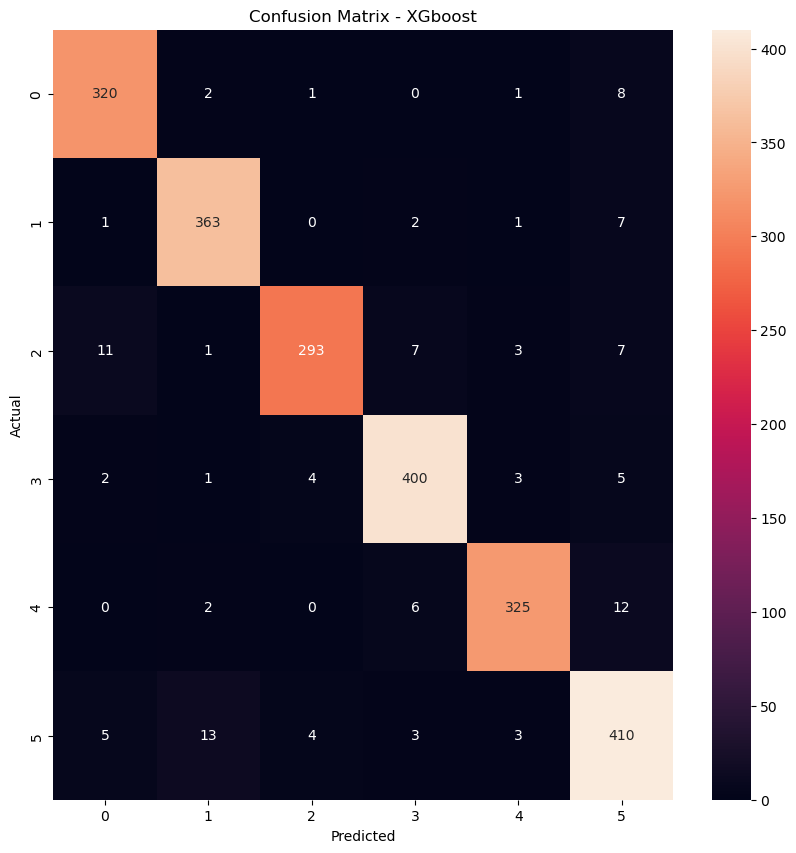

In [64]:
conf_mat= confusion_matrix(y_test,pred)
label_encoder.fit(y_test)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(label_encoder.classes_), yticklabels=list(label_encoder.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - XGboost')
plt.show()